 # 【問題1】公式Exampleを分担して実行
TensorFLowの公式Exampleを分担して実行してください。

以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。


 - 次のチュートリアルを実装したが、学習が終わらなかった。
<br>

https://www.tensorflow.org/tutorials/text/image_captioning

# 【問題3】Iris（2値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

In [1]:
import numpy as np
import pandas as pd
from keras import backend as K
from sklearn.metrics import classification_report

Using TensorFlow backend.
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/naoki/opt/anaconda3/lib/python3.7/sit

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X = iris.data[:100]
y = iris.target[:100]

In [4]:
from sklearn.model_selection import train_test_split

(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)
(X_train, X_val,
 y_train, y_val) = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0,
)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import tensorflow as tf

model = Sequential()
model.add(Dense(1, input_shape=(4,)))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=5,
                    epochs=50,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
56/56 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5536
Epoch 2/50
56/56 [==============================] - 0s 181us/step

In [6]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [8]:
y_pred_proba_val = model.predict(X_val)
y_pred_val = np.where(y_pred_proba_val >0.5, 1, 0)
print("適合率:{}".format(precision_score(y_val,y_pred_val)))
print("再現率:{}".format(recall_score(y_val,y_pred_val)))
print("F値 :{}".format(f1_score(y_val,y_pred_val)))
print(confusion_matrix(y_val, y_pred_val))

適合率:1.0
再現率:1.0
F値 :1.0
[[ 9  0]
 [ 0 10]]


In [9]:
y_pred_proba = model.predict(X_test)
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

適合率:1.0
再現率:1.0
F値 :1.0
[[13  0]
 [ 0 12]]


In [10]:
K.clear_session( )
input_data = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=100,
                    verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100

56/56 [==============================] - 0s 766us/sample - loss: 4.7146e-06 - acc: 1.0000
Epoch 68/100
56/56 [==============================] - 0s 758us/sample - loss: 4.5173e-06 - acc: 1.0000
Epoch 69/100
56/56 [==============================] - 0s 796us/sample - loss: 4.3313e-06 - acc: 1.0000
Epoch 70/100
56/56 [==============================] - 0s 809us/sample - loss: 4.1157e-06 - acc: 1.0000
Epoch 71/100
56/56 [==============================] - 0s 788us/sample - loss: 4.1185e-06 - acc: 1.0000
Epoch 72/100
56/56 [==============================] - 0s 714us/sample - loss: 3.8331e-06 - acc: 1.0000
Epoch 73/100
56/56 [==============================] - 0s 756us/sample - loss: 3.7552e-06 - acc: 1.0000
Epoch 74/100
56/56 [==============================] - 0s 680us/sample - loss: 3.5149e-06 - acc: 1.0000
Epoch 75/100
56/56 [==============================] - 0s 711us/sample - loss: 3.4305e-06 - acc: 1.0000
Epoch 76/100
56/56 [==============================] - 0s 700us/sample - loss: 3.3317e-

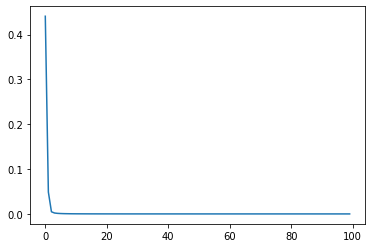

In [11]:
plt.plot(history.history['loss'])
plt.show()

In [12]:
y_pred_proba_val = model.predict(X_val)
y_pred_val = np.where(y_pred_proba_val >0.5, 1, 0)
print("適合率:{}".format(precision_score(y_val,y_pred_val)))
print("再現率:{}".format(recall_score(y_val,y_pred_val)))
print("F値 :{}".format(f1_score(y_val,y_pred_val)))
print(confusion_matrix(y_val, y_pred_val))

適合率:1.0
再現率:1.0
F値 :1.0
[[ 9  0]
 [ 0 10]]


In [13]:
y_pred_proba = model.predict(X_test)
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

適合率:1.0
再現率:1.0
F値 :1.0
[[13  0]
 [ 0 12]]


 # 【問題4】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

In [15]:
X = iris.data
y = iris.target

In [16]:
y = np.array(pd.get_dummies(y))

In [17]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)
(X_train, X_val,
 y_train, y_val) = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0,
)

In [18]:
K.clear_session( )
input_data = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=1000,
                    verbose=1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
84/84 [==============================] - 0s 1ms/sample - loss: 0.6969 - acc: 0.6667
Epoch 2/1000
84/84 [============

84/84 [==============================] - 0s 907us/sample - loss: 0.0909 - acc: 0.9405
Epoch 74/1000
84/84 [==============================] - 0s 885us/sample - loss: 0.1251 - acc: 0.9405
Epoch 75/1000
84/84 [==============================] - 0s 734us/sample - loss: 0.0887 - acc: 0.9762
Epoch 76/1000
84/84 [==============================] - 0s 674us/sample - loss: 0.1538 - acc: 0.9167
Epoch 77/1000
84/84 [==============================] - 0s 667us/sample - loss: 0.0635 - acc: 0.9643
Epoch 78/1000
84/84 [==============================] - 0s 687us/sample - loss: 0.0803 - acc: 0.9762
Epoch 79/1000
84/84 [==============================] - 0s 661us/sample - loss: 0.1678 - acc: 0.9524
Epoch 80/1000
84/84 [==============================] - 0s 728us/sample - loss: 0.0664 - acc: 0.9643
Epoch 81/1000
84/84 [==============================] - 0s 721us/sample - loss: 0.0859 - acc: 0.9762
Epoch 82/1000
84/84 [==============================] - 0s 721us/sample - loss: 0.1770 - acc: 0.9286
Epoch 83/1000


84/84 [==============================] - 0s 679us/sample - loss: 0.1379 - acc: 0.9405
Epoch 155/1000
84/84 [==============================] - 0s 711us/sample - loss: 0.0617 - acc: 0.9762
Epoch 156/1000
84/84 [==============================] - 0s 687us/sample - loss: 0.0697 - acc: 0.9643
Epoch 157/1000
84/84 [==============================] - 0s 683us/sample - loss: 0.0692 - acc: 0.9762
Epoch 158/1000
84/84 [==============================] - 0s 687us/sample - loss: 0.0543 - acc: 0.9762
Epoch 159/1000
84/84 [==============================] - 0s 660us/sample - loss: 0.0849 - acc: 0.9643
Epoch 160/1000
84/84 [==============================] - 0s 683us/sample - loss: 0.0616 - acc: 0.9643
Epoch 161/1000
84/84 [==============================] - 0s 704us/sample - loss: 0.0677 - acc: 0.9762
Epoch 162/1000
84/84 [==============================] - 0s 722us/sample - loss: 0.2480 - acc: 0.9167
Epoch 163/1000
84/84 [==============================] - 0s 664us/sample - loss: 0.0958 - acc: 0.9643
Epoch

84/84 [==============================] - 0s 979us/sample - loss: 0.0497 - acc: 0.9643
Epoch 236/1000
84/84 [==============================] - 0s 870us/sample - loss: 0.0652 - acc: 0.9762
Epoch 237/1000
84/84 [==============================] - 0s 804us/sample - loss: 0.0597 - acc: 0.9762
Epoch 238/1000
84/84 [==============================] - 0s 773us/sample - loss: 0.0727 - acc: 0.9643
Epoch 239/1000
84/84 [==============================] - 0s 804us/sample - loss: 0.0555 - acc: 0.9762
Epoch 240/1000
84/84 [==============================] - 0s 733us/sample - loss: 0.0543 - acc: 0.9643
Epoch 241/1000
84/84 [==============================] - 0s 735us/sample - loss: 0.1033 - acc: 0.9405
Epoch 242/1000
84/84 [==============================] - 0s 749us/sample - loss: 0.0684 - acc: 0.9643
Epoch 243/1000
84/84 [==============================] - 0s 757us/sample - loss: 0.1309 - acc: 0.9762
Epoch 244/1000
84/84 [==============================] - 0s 751us/sample - loss: 0.0794 - acc: 0.9643
Epoch

84/84 [==============================] - 0s 777us/sample - loss: 0.0519 - acc: 0.9762
Epoch 317/1000
84/84 [==============================] - 0s 742us/sample - loss: 0.1584 - acc: 0.9405
Epoch 318/1000
84/84 [==============================] - 0s 762us/sample - loss: 0.1290 - acc: 0.9524
Epoch 319/1000
84/84 [==============================] - 0s 773us/sample - loss: 0.0622 - acc: 0.9762
Epoch 320/1000
84/84 [==============================] - 0s 755us/sample - loss: 0.0445 - acc: 0.9881
Epoch 321/1000
84/84 [==============================] - 0s 759us/sample - loss: 0.1041 - acc: 0.9643
Epoch 322/1000
84/84 [==============================] - 0s 743us/sample - loss: 0.1171 - acc: 0.9405
Epoch 323/1000
84/84 [==============================] - 0s 754us/sample - loss: 0.0522 - acc: 0.9643
Epoch 324/1000
84/84 [==============================] - 0s 749us/sample - loss: 0.0828 - acc: 0.9524
Epoch 325/1000
84/84 [==============================] - 0s 754us/sample - loss: 0.0717 - acc: 0.9643
Epoch

84/84 [==============================] - 0s 721us/sample - loss: 0.0671 - acc: 0.9762
Epoch 398/1000
84/84 [==============================] - 0s 699us/sample - loss: 0.0485 - acc: 0.9643
Epoch 399/1000
84/84 [==============================] - 0s 711us/sample - loss: 0.0595 - acc: 0.9643
Epoch 400/1000
84/84 [==============================] - 0s 701us/sample - loss: 0.0726 - acc: 0.9643
Epoch 401/1000
84/84 [==============================] - 0s 697us/sample - loss: 0.0799 - acc: 0.9762
Epoch 402/1000
84/84 [==============================] - 0s 752us/sample - loss: 0.1431 - acc: 0.9524
Epoch 403/1000
84/84 [==============================] - 0s 720us/sample - loss: 0.0660 - acc: 0.9762
Epoch 404/1000
84/84 [==============================] - 0s 694us/sample - loss: 0.0544 - acc: 0.9762
Epoch 405/1000
84/84 [==============================] - 0s 710us/sample - loss: 0.1087 - acc: 0.9405
Epoch 406/1000
84/84 [==============================] - 0s 713us/sample - loss: 0.0577 - acc: 0.9643
Epoch

84/84 [==============================] - 0s 764us/sample - loss: 0.0876 - acc: 0.9405
Epoch 479/1000
84/84 [==============================] - 0s 737us/sample - loss: 0.0770 - acc: 0.9643
Epoch 480/1000
84/84 [==============================] - 0s 715us/sample - loss: 0.0764 - acc: 0.9524
Epoch 481/1000
84/84 [==============================] - 0s 709us/sample - loss: 0.0827 - acc: 0.9524
Epoch 482/1000
84/84 [==============================] - 0s 692us/sample - loss: 0.0836 - acc: 0.9643
Epoch 483/1000
84/84 [==============================] - 0s 749us/sample - loss: 0.0360 - acc: 0.9881
Epoch 484/1000
84/84 [==============================] - 0s 746us/sample - loss: 0.0805 - acc: 0.9524
Epoch 485/1000
84/84 [==============================] - 0s 839us/sample - loss: 0.0496 - acc: 0.9762
Epoch 486/1000
84/84 [==============================] - 0s 801us/sample - loss: 0.0607 - acc: 0.9762
Epoch 487/1000
84/84 [==============================] - 0s 787us/sample - loss: 0.0601 - acc: 0.9881
Epoch

84/84 [==============================] - 0s 815us/sample - loss: 0.0607 - acc: 0.9762
Epoch 560/1000
84/84 [==============================] - 0s 707us/sample - loss: 0.0962 - acc: 0.9762
Epoch 561/1000
84/84 [==============================] - 0s 713us/sample - loss: 0.0562 - acc: 0.9762
Epoch 562/1000
84/84 [==============================] - 0s 739us/sample - loss: 0.0886 - acc: 0.9643
Epoch 563/1000
84/84 [==============================] - 0s 721us/sample - loss: 0.0974 - acc: 0.9405
Epoch 564/1000
84/84 [==============================] - 0s 768us/sample - loss: 0.0495 - acc: 0.9762
Epoch 565/1000
84/84 [==============================] - 0s 707us/sample - loss: 0.0435 - acc: 0.9762
Epoch 566/1000
84/84 [==============================] - 0s 771us/sample - loss: 0.0438 - acc: 0.9881
Epoch 567/1000
84/84 [==============================] - 0s 719us/sample - loss: 0.0794 - acc: 0.9524
Epoch 568/1000
84/84 [==============================] - 0s 706us/sample - loss: 0.1713 - acc: 0.9286
Epoch

84/84 [==============================] - 0s 753us/sample - loss: 0.4930 - acc: 0.9167
Epoch 641/1000
84/84 [==============================] - 0s 733us/sample - loss: 0.0690 - acc: 0.9643
Epoch 642/1000
84/84 [==============================] - 0s 732us/sample - loss: 0.6668 - acc: 0.9524
Epoch 643/1000
84/84 [==============================] - 0s 699us/sample - loss: 0.1844 - acc: 0.9286
Epoch 644/1000
84/84 [==============================] - 0s 724us/sample - loss: 0.0948 - acc: 0.9762
Epoch 645/1000
84/84 [==============================] - 0s 716us/sample - loss: 0.0761 - acc: 0.9643
Epoch 646/1000
84/84 [==============================] - 0s 720us/sample - loss: 0.0794 - acc: 0.9524
Epoch 647/1000
84/84 [==============================] - 0s 816us/sample - loss: 0.0485 - acc: 0.9762
Epoch 648/1000
84/84 [==============================] - 0s 733us/sample - loss: 0.0652 - acc: 0.9762
Epoch 649/1000
84/84 [==============================] - 0s 733us/sample - loss: 0.0659 - acc: 0.9405
Epoch

84/84 [==============================] - 0s 735us/sample - loss: 0.0434 - acc: 0.9762
Epoch 722/1000
84/84 [==============================] - 0s 726us/sample - loss: 0.0385 - acc: 0.9762
Epoch 723/1000
84/84 [==============================] - 0s 738us/sample - loss: 0.0453 - acc: 0.9762
Epoch 724/1000
84/84 [==============================] - 0s 713us/sample - loss: 0.0824 - acc: 0.9643
Epoch 725/1000
84/84 [==============================] - 0s 728us/sample - loss: 0.0873 - acc: 0.9643
Epoch 726/1000
84/84 [==============================] - 0s 755us/sample - loss: 0.0352 - acc: 0.9881
Epoch 727/1000
84/84 [==============================] - 0s 730us/sample - loss: 0.0847 - acc: 0.9643
Epoch 728/1000
84/84 [==============================] - 0s 724us/sample - loss: 0.0508 - acc: 0.9762
Epoch 729/1000
84/84 [==============================] - 0s 771us/sample - loss: 0.0761 - acc: 0.9643
Epoch 730/1000
84/84 [==============================] - 0s 905us/sample - loss: 0.0549 - acc: 0.9643
Epoch

84/84 [==============================] - 0s 737us/sample - loss: 0.0638 - acc: 0.9524
Epoch 803/1000
84/84 [==============================] - 0s 719us/sample - loss: 0.0496 - acc: 0.9762
Epoch 804/1000
84/84 [==============================] - 0s 750us/sample - loss: 0.0454 - acc: 0.9881
Epoch 805/1000
84/84 [==============================] - 0s 747us/sample - loss: 0.3463 - acc: 0.9405
Epoch 806/1000
84/84 [==============================] - 0s 725us/sample - loss: 0.0625 - acc: 0.9643
Epoch 807/1000
84/84 [==============================] - 0s 738us/sample - loss: 0.0549 - acc: 0.9643
Epoch 808/1000
84/84 [==============================] - 0s 708us/sample - loss: 0.0552 - acc: 0.9762
Epoch 809/1000
84/84 [==============================] - 0s 725us/sample - loss: 0.0455 - acc: 0.9762
Epoch 810/1000
84/84 [==============================] - 0s 775us/sample - loss: 0.0450 - acc: 0.9643
Epoch 811/1000
84/84 [==============================] - 0s 728us/sample - loss: 0.0526 - acc: 0.9762
Epoch

84/84 [==============================] - 0s 713us/sample - loss: 0.0482 - acc: 0.9762
Epoch 884/1000
84/84 [==============================] - 0s 738us/sample - loss: 0.0666 - acc: 0.9643
Epoch 885/1000
84/84 [==============================] - 0s 722us/sample - loss: 0.0637 - acc: 0.9762
Epoch 886/1000
84/84 [==============================] - 0s 743us/sample - loss: 0.0649 - acc: 0.9524
Epoch 887/1000
84/84 [==============================] - 0s 711us/sample - loss: 0.0458 - acc: 0.9881
Epoch 888/1000
84/84 [==============================] - 0s 737us/sample - loss: 0.0481 - acc: 0.9762
Epoch 889/1000
84/84 [==============================] - 0s 731us/sample - loss: 0.0441 - acc: 0.9762
Epoch 890/1000
84/84 [==============================] - 0s 747us/sample - loss: 0.0688 - acc: 0.9762
Epoch 891/1000
84/84 [==============================] - 0s 725us/sample - loss: 0.0800 - acc: 0.9762
Epoch 892/1000
84/84 [==============================] - 0s 722us/sample - loss: 0.0516 - acc: 0.9762
Epoch

84/84 [==============================] - 0s 725us/sample - loss: 0.0551 - acc: 0.9762
Epoch 965/1000
84/84 [==============================] - 0s 721us/sample - loss: 0.0797 - acc: 0.9643
Epoch 966/1000
84/84 [==============================] - 0s 726us/sample - loss: 0.0472 - acc: 0.9643
Epoch 967/1000
84/84 [==============================] - 0s 741us/sample - loss: 0.0593 - acc: 0.9643
Epoch 968/1000
84/84 [==============================] - 0s 770us/sample - loss: 0.0639 - acc: 0.9524
Epoch 969/1000
84/84 [==============================] - 0s 772us/sample - loss: 0.0514 - acc: 0.9881
Epoch 970/1000
84/84 [==============================] - 0s 754us/sample - loss: 0.0570 - acc: 0.9762
Epoch 971/1000
84/84 [==============================] - 0s 720us/sample - loss: 0.0555 - acc: 0.9762
Epoch 972/1000
84/84 [==============================] - 0s 743us/sample - loss: 0.0539 - acc: 0.9643
Epoch 973/1000
84/84 [==============================] - 0s 752us/sample - loss: 0.0657 - acc: 0.9643
Epoch

In [19]:
y_pred_proba_val = model.predict(X_val)
y_pred_val = np.where(y_pred_proba_val >0.5, 1, 0)
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28
 samples avg       1.00      1.00      1.00        28



In [20]:
y_pred_proba = model.predict(X_test)
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

   micro avg       0.95      0.95      0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38
 samples avg       0.95      0.95      0.95        38



In [21]:
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(20, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(30, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))


model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=100,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 93        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
84/84 [==============================] - 0s 1ms/sample - loss: 0.6788 - acc: 0.7381
Epoch 2/100
84/84 [==============================] - 0s 803us/sample - loss: 0.2743 - acc: 0.8571
Epoch 3/100
84/84 [==============================] - 0s 855us/

84/84 [==============================] - 0s 701us/sample - loss: 0.0672 - acc: 0.9643
Epoch 76/100
84/84 [==============================] - 0s 743us/sample - loss: 0.0852 - acc: 0.9524
Epoch 77/100
84/84 [==============================] - 0s 729us/sample - loss: 0.1171 - acc: 0.9762
Epoch 78/100
84/84 [==============================] - 0s 729us/sample - loss: 0.0691 - acc: 0.9524
Epoch 79/100
84/84 [==============================] - 0s 719us/sample - loss: 0.0608 - acc: 0.9762
Epoch 80/100
84/84 [==============================] - 0s 739us/sample - loss: 0.1791 - acc: 0.9524
Epoch 81/100
84/84 [==============================] - 0s 717us/sample - loss: 0.3214 - acc: 0.8929
Epoch 82/100
84/84 [==============================] - 0s 747us/sample - loss: 0.0540 - acc: 0.9881
Epoch 83/100
84/84 [==============================] - 0s 699us/sample - loss: 0.0875 - acc: 0.9643
Epoch 84/100
84/84 [==============================] - 0s 721us/sample - loss: 0.2429 - acc: 0.9405
Epoch 85/100
84/84 [===

In [22]:
y_pred_proba_val = model.predict(X_val)
y_pred_val = np.where(y_pred_proba_val >0.5, 1, 0)
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28
 samples avg       1.00      1.00      1.00        28



In [23]:
y_pred_proba = model.predict(X_test)
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38
 samples avg       0.97      0.97      0.97        38



 # 【問題5】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [24]:
housing = pd.read_csv("/Users/naoki/train.csv")

In [25]:
X = housing[["GrLivArea", "YearBuilt"]]
X = np.log(X)

In [26]:
y = housing["SalePrice"]
y = np.log(y)

In [27]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)
(X_train, X_val,
 y_train, y_val) = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0,
)

In [28]:
K.clear_session( )
input_data = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(20, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(20, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),)
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=50,
                    verbose=1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_______________________________________________________________

In [29]:
from sklearn.metrics import mean_squared_error
y_pred_proba_val = model.predict(X_val)
print(mean_squared_error(y_val, y_pred_proba_val))

122.09880071913767


In [30]:
y_pred_proba = model.predict(X_test)
print(mean_squared_error(y_test, y_pred_proba))

121.79743138298002


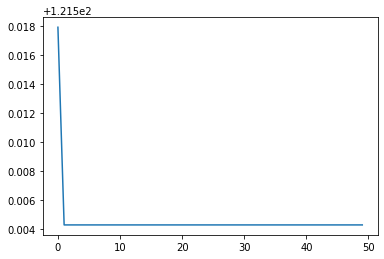

In [31]:
plt.plot(history.history['loss'])
plt.show()

In [32]:
K.clear_session( )
input_data = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
y1 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
y2 = tf.keras.layers.Dense(20, activation=tf.nn.relu)(x)
y3 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x)
z = tf.keras.layers.concatenate([y1, y2, y3])
output = tf.keras.layers.Dense(1)(z)
model = tf.keras.Model(inputs=input_data, outputs=output)


model.summary()

model.compile(loss='mean_squared_error',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),)
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=50,
                    verbose=1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 10)           30          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           110         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 10)           110         dense_1[0][0]                    
______________________________________________________________________________________________

In [33]:
y_pred_proba_val = model.predict(X_val)
print(mean_squared_error(y_val, y_pred_proba_val))

0.1239332529123039


In [34]:
y_pred_proba = model.predict(X_test)
print(mean_squared_error(y_test, y_pred_proba))

0.11797413363809524


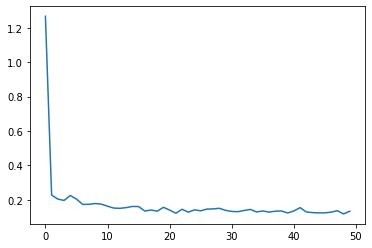

In [35]:
plt.plot(history.history['loss'])
plt.show()

# 【問題6】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [36]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [37]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [38]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min())

1.0
0.0


In [39]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) 

(60000,)
(60000, 10)
float64


In [40]:
(X_train, X_val,
 y_train, y_val) = train_test_split(
    X_train, y_train_one_hot, test_size=0.25, random_state=0,
)

In [41]:
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(300, activation = tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(500, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(300, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(500, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=50,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total params: 691,810
Trainable params: 691,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
45000/45000 [==============================] - 3s 61us/sample - loss: 0.4221 - acc: 0.8884
Epoch 2/50
450

In [42]:
y_pred_proba_val = model.predict(X_val)
np.argmax(y_pred_proba_val,axis=1)

array([3, 6, 6, ..., 9, 7, 2])

In [43]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [44]:
y_pred_proba_val = model.predict(X_val)
y_pred_val = np.argmax(y_pred_proba_val,axis=1)
y_val_ = np.argmax(y_val,axis=1)
print(classification_report(y_val_,y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1510
           1       0.97      0.99      0.98      1728
           2       0.96      0.96      0.96      1458
           3       0.97      0.95      0.96      1548
           4       0.96      0.97      0.97      1434
           5       0.96      0.94      0.95      1342
           6       0.97      0.98      0.97      1468
           7       0.98      0.97      0.97      1535
           8       0.93      0.96      0.94      1484
           9       0.93      0.96      0.95      1493

    accuracy                           0.96     15000
   macro avg       0.96      0.96      0.96     15000
weighted avg       0.96      0.96      0.96     15000



In [45]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
y_test = np.argmax(y_test,axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.94      0.96       892
           6       0.96      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.93      0.96      0.95       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [46]:
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(200))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=50,
                    verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
________________________________________________

In [47]:
y_pred_proba_val = model.predict(X_val)
y_pred_val = np.argmax(y_pred_proba_val,axis=1)
y_val_ = np.argmax(y_val,axis=1)
print(classification_report(y_val_,y_pred_val))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1510
           1       0.99      0.99      0.99      1728
           2       0.98      0.97      0.97      1458
           3       0.96      0.96      0.96      1548
           4       0.97      0.96      0.97      1434
           5       0.96      0.95      0.95      1342
           6       0.98      0.98      0.98      1468
           7       0.98      0.97      0.97      1535
           8       0.97      0.96      0.96      1484
           9       0.94      0.97      0.95      1493

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000



In [48]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
# y_test = np.argmax(y_test,axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.99      0.96      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [49]:
X_train.shape

(45000, 784)

In [50]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.175)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
K.clear_session( )

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               2765100   
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)             

In [52]:
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# # 0-255の整数値を0〜1の小数に変換する
# # MNISTって必ずこの処理入るけれど、意味あるのかな
# x_train = x_train.astype('float32')
# x_valid = x_valid.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_valid /= 255
# x_test /= 255

# # one-hot vector形式に変換する
# enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
# y_train = enc.fit_transform(y_train[:, np.newaxis])
# y_test = enc.transform(y_test[:, np.newaxis])
# y_valid = enc.transform(y_valid[:, np.newaxis])

In [53]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(X_train, X_val,
 y_train, y_val) = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0,
)


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255


enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train = enc.fit_transform(y_train[:, np.newaxis])
y_test = enc.transform(y_test[:, np.newaxis])

In [54]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=5,
                    verbose=1)

Epoch 1/5
45000/45000 [==============================] - 32s 704us/step - loss: 0.3382 - accuracy: 0.8952
Epoch 2/5
45000/45000 [==============================] - 33s 727us/step - loss: 0.1863 - accuracy: 0.9449
Epoch 3/5
45000/45000 [==============================] - 34s 749us/step - loss: 0.1720 - accuracy: 0.9494
Epoch 4/5
45000/45000 [==============================] - 35s 773us/step - loss: 0.1670 - accuracy: 0.9497
Epoch 5/5
45000/45000 [==============================] - 35s 774us/step - loss: 0.1564 - accuracy: 0.9545


In [55]:
y_train.shape

(45000, 10)